## CSCI 5622-073: Machine Learning Project
## Author: Nikhil B M
## University of Colorado, Boulder

## Linear Regression


Importing required libraries.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import datetime
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import matplotlib.mlab as mlab
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt


In [23]:
# read the data
input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/"
weather_input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Weather_Data/"

nyc_taxi_Jan_2022_cleaned = pd.read_csv(input_dir+"yellow_tripdata_2022-01_cleaned.csv")
Preprocessed_data = pd.read_csv("D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/nyc_taxi_Jan_2022_cleaned_Preprocessed_data.csv")
weather_data_Jan_2022 =  pd.read_csv(weather_input_dir+"weather_data_Jan_2022_cleaned.csv")
nyc_taxi_lookup = pd.read_csv("D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Lookups/taxi+_zone_lookup.csv")

In [24]:
Preprocessed_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed,X_DO,Y_DO,Borough_DO,Zone_DO,X_PU,Y_PU,Borough_PU,Zone_PU
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,1.641023e+09,12.797007,-73.956972,40.780491,Manhattan,Upper East Side North,-73.981352,40.773906,Manhattan,Lincoln Square East
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,1.641022e+09,15.000000,-73.939516,40.821046,Manhattan,Central Harlem North,-73.956972,40.780491,Manhattan,Upper East Side North
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,1.641024e+09,6.490706,-73.961815,40.809570,Manhattan,Morningside Heights,-73.961815,40.809570,Manhattan,Morningside Heights
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,1.641022e+09,6.518272,-73.999940,40.748397,Manhattan,East Chelsea,-73.998678,40.728612,Manhattan,Greenwich Village South
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,1.641023e+09,6.873890,-73.978367,40.764425,Manhattan,Midtown North,-73.999940,40.748397,Manhattan,East Chelsea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258967,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1,1.50,1,N,163,143,2,7.5,3.0,0.5,0.00,0.0,0.3,11.30,2.5,0.0,8.316667,1.643697e+09,10.821640,-73.987970,40.775770,Manhattan,Lincoln Square West,-73.978370,40.764430,Manhattan,Midtown North
2258968,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1,1.02,1,N,249,68,1,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0,4.350000,1.643696e+09,14.068970,-73.999940,40.748400,Manhattan,East Chelsea,-74.002500,40.734610,Manhattan,West Village
2258969,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1,1.53,1,N,68,90,1,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5,0.0,8.216667,1.643697e+09,11.172410,-73.996780,40.742550,Manhattan,Flatiron,-73.999940,40.748400,Manhattan,East Chelsea
2258970,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1,1.59,1,N,90,79,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0,7.750000,1.643697e+09,12.309680,-73.985210,40.727940,Manhattan,East Village,-73.996780,40.742550,Manhattan,Flatiron


# Encode categorical variables

In [25]:
Preprocessed_data["store_and_fwd_flag"]

0          N
1          N
2          N
3          N
4          N
          ..
2258967    N
2258968    N
2258969    N
2258970    N
2258971    N
Name: store_and_fwd_flag, Length: 2258972, dtype: object

In [26]:
Preprocessed_data['store_and_fwd_flag'] = Preprocessed_data['store_and_fwd_flag'].map({'N':0,'Y':1})

In [27]:
Preprocessed_data["store_and_fwd_flag"]

0          0
1          0
2          0
3          0
4          0
          ..
2258967    0
2258968    0
2258969    0
2258970    0
2258971    0
Name: store_and_fwd_flag, Length: 2258972, dtype: int64

## Drop Unnecessary Features

In [40]:
Preprocessed_data['pickup_month'] = pd.to_datetime(Preprocessed_data['tpep_pickup_datetime']).dt.month
Preprocessed_data['pickup_hour'] = pd.to_datetime(Preprocessed_data['tpep_pickup_datetime']).dt.hour
Preprocessed_data['pickup_weekday'] =pd.to_datetime(Preprocessed_data['tpep_pickup_datetime']).dt.weekday

In [42]:
Preprocessed_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
trip_times               float64
pickup_times             float64
Speed                    float64
X_DO                     float64
Y_DO                     float64
Borough_DO                object
Zone_DO                   object
X_PU                     float64
Y_PU                     float64
Borough_PU                object
Zone_PU                   object
pickup_mon

In [41]:
Preprocessed_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_times',
       'pickup_times', 'Speed', 'X_DO', 'Y_DO', 'Borough_DO', 'Zone_DO',
       'X_PU', 'Y_PU', 'Borough_PU', 'Zone_PU', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

In [45]:
Preprocessed_data_1 = Preprocessed_data.loc[:, ['VendorID', 'passenger_count','X_PU', 'Y_PU',
                                             'X_DO', 'Y_DO','store_and_fwd_flag','pickup_month', 'pickup_hour', 
                                             'pickup_weekday','trip_distance', 'trip_times']]
Preprocessed_data_2 = Preprocessed_data.loc[:, ['trip_distance', 'trip_times']]

In [49]:
Preprocessed_data_1.head(10)

,VendorID,passenger_count,X_PU,Y_PU,X_DO,Y_DO,store_and_fwd_flag,pickup_month,pickup_hour,pickup_weekday,trip_distance,trip_times
0,1,2,-73.981352,40.773906,-73.956972,40.780491,0,1,0,5,3.80,17.816667
1,1,1,-73.956972,40.780491,-73.939516,40.821046,0,1,0,5,2.10,8.400000
2,2,1,-73.961815,40.809570,-73.961815,40.809570,0,1,0,5,0.97,8.966667
3,2,1,-73.998678,40.728612,-73.999940,40.748397,0,1,0,5,1.09,10.033333
4,2,1,-73.999940,40.748397,-73.978367,40.764425,0,1,0,5,4.30,37.533333
5,1,1,-73.872804,40.774867,-73.977432,40.758226,0,1,0,5,10.30,29.550000
6,2,1,-73.971256,40.749172,-74.007812,40.706660,0,1,0,5,5.07,14.133333
7,2,1,-73.972815,40.791766,-73.954325,40.817577,0,1,0,5,2.02,9.683333
8,2,1,-73.961815,40.809570,-73.956972,40.780491,0,1,0,5,2.71,14.783333
9,2,1,-73.956972,40.780491,-73.959713,40.766839,0,1,0,5,0.78,4.600000


In [66]:
Preprocessed_data_2
Preprocessed_data_2.sample(n = 158972)
Preprocessed_data_1.sample(n = 158972)


,VendorID,passenger_count,X_PU,Y_PU,X_DO,Y_DO,store_and_fwd_flag,pickup_month,pickup_hour,pickup_weekday,trip_distance,trip_times
1594260,2,2,-73.98418,40.75984,-73.98593,40.74881,0,1,23,5,1.46,8.650000
1856068,2,1,-73.97743,40.75823,-73.97837,40.76443,0,1,13,2,1.23,10.166670
2221408,2,1,-73.97694,40.74765,-73.95971,40.76684,0,1,15,0,2.65,18.700000
1688398,1,1,-73.98135,40.77391,-73.95697,40.78049,0,1,11,0,2.10,14.583330
63315,1,3,-73.98879,40.75351,-74.01549,40.70249,0,1,8,6,4.10,13.716670
...,...,...,...,...,...,...,...,...,...,...,...,...
247374,2,1,-74.00250,40.73461,-73.97837,40.76443,0,1,2,2,2.76,8.400000
2099725,2,1,-73.99678,40.74255,-74.00250,40.73461,0,1,13,5,1.09,5.666667
520485,2,2,-73.98521,40.72794,-73.99048,40.74031,0,1,21,5,1.54,10.066670
449210,1,1,-73.98986,40.76224,-73.98986,40.76224,0,1,22,4,0.70,3.800000


## Modelling for linear regression

In [86]:
# Split
# Create matrix of features
X = Preprocessed_data_2[['trip_distance']] # double brackets!

# Create array of target variable 
y = Preprocessed_data_2['trip_times']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [87]:
#X_test
X_test

,trip_distance
1861565,1.22
1536838,0.53
1529053,1.41
1548122,18.61
12813,1.85
...,...
1835097,1.10
1842059,1.78
2029950,2.90
342488,2.36


In [88]:
# save the data
output_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/"
X_test.to_csv(output_dir+"LR_Test_data.csv")

In [59]:
#  Import model
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

LinearRegression()

Linear Regression Performance Metrics
R^2= 0.5399445611671416
MAE: 3.8439895990348916
MSE: 49.84221141126522
RMSE: 7.059901657336681


In [60]:
mse = mean_squared_error(y_test, y_pred_lreg)
r2 = r2_score(y_test, y_pred_lreg)

print('Mean squared error: %.2f' % mse)
print('Coefficient of determination: %.2f' % r2)

Mean squared error: 49.84
Coefficient of determination: 0.54


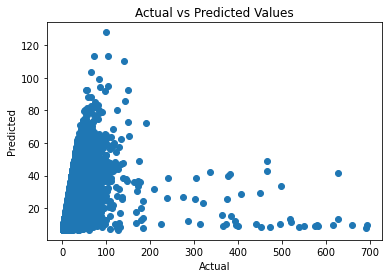

In [61]:
# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lreg)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

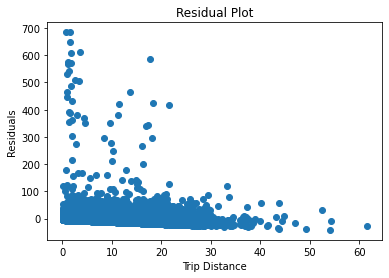

In [62]:
# Calculate the residuals
residuals = y_test - y_pred_lreg

# Create a residual plot
plt.scatter(X_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Trip Distance')
plt.ylabel('Residuals')
plt.show()

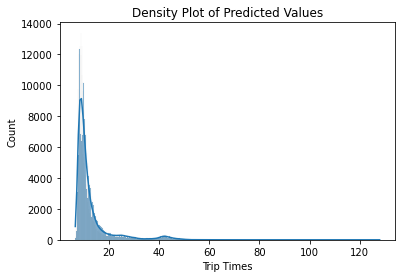

In [63]:
# Create a density plot of predicted values
sns.histplot(y_pred_lreg, kde=True)
plt.title('Density Plot of Predicted Values')
plt.xlabel('Trip Times')
plt.show()


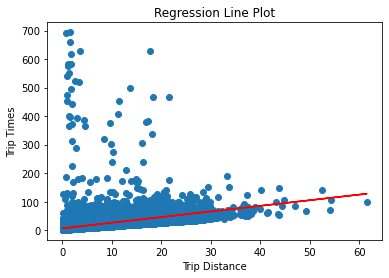

In [65]:
# Create a regression line plot
plt.scatter(X_test, y_test)
X_test_reshaped = np.array(X_test).reshape(-1, 1)
plt.plot(X_test_reshaped, y_pred_lreg, color='red')
plt.title('Regression Line Plot')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Times')
plt.show()


## Modelling for multiple linear regression

In [74]:
X = Preprocessed_data_1.drop(['trip_times'], axis=1) # independent variables
y = Preprocessed_data_1['trip_times'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Linear Regression Performance Metrics
R^2= 0.5421420947629046
MAE: 3.666592277631932
MSE: 51.16243251602525
RMSE: 7.152791938538773
